### Student Information:
### ● Name :Samruddhi Krishna Bhujbal
### ● Roll Number:202201070011
### ● Batch:T1

# MLP With Sklearn

Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.80      0.50      0.62         8

    accuracy                           0.75        20
   macro avg       0.77      0.71      0.72        20
weighted avg       0.76      0.75      0.74        20



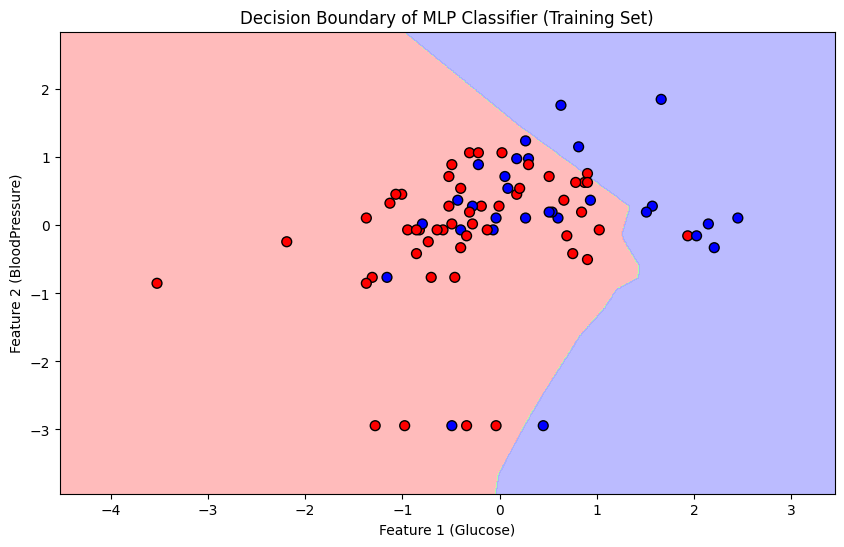

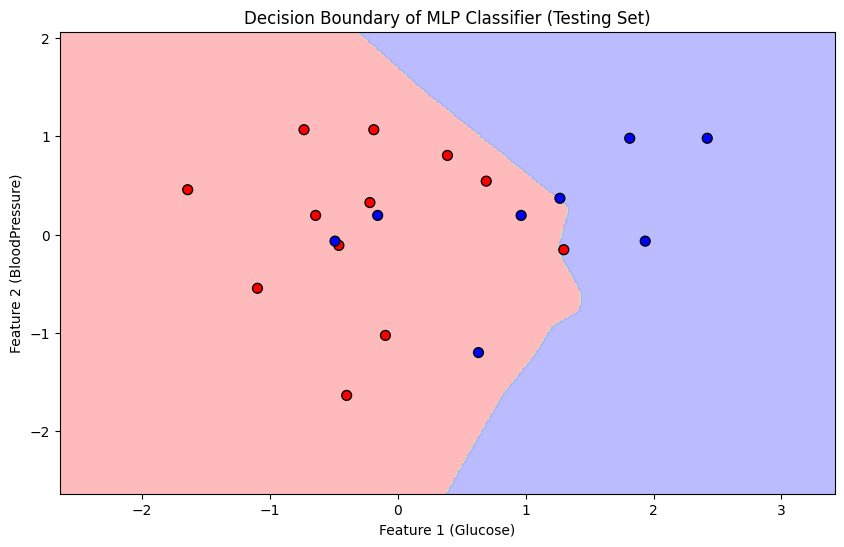

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('/content/diabetes.csv')


categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Select only two features for visualization
X = df[['Glucose', 'BloodPressure']]
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light shades for background
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])   # Bold colors for points

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title, dataset_type):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    plt.title(f"Decision Boundary of MLP Classifier ({dataset_type} Set)")
    plt.xlabel("Feature 1 (Glucose)")
    plt.ylabel("Feature 2 (BloodPressure)")
    plt.show()

# Plot decision boundary for training set
plot_decision_boundary(X_train, y_train, mlp, "MLP Classifier", "Training")

# Plot decision boundary for testing set
plot_decision_boundary(X_test, y_test, mlp, "MLP Classifier", "Testing")


# Keras Implemenation

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:

# Load dataset
df = pd.read_csv('/content/diabetes.csv')
# Extract features and target
X = df.iloc[:, 1:8].values
y = df["Outcome"].values

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
# - StandardScaler is used to normalize the features by removing the mean and scaling to unit variance
# - This helps the neural network converge faster and improves performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on training data and transform it
X_test = scaler.transform(X_test)        # Transform the testing data using the same scaler

In [ ]:

model = Sequential([
    Dense(26, activation='relu', input_dim=X_train.shape[1]),  # Hidden layer with 26 neurons and ReLU activation
    Dense(13, activation='relu'),  # Another hidden layer with 13 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.4792 - loss: 0.7056 - val_accuracy: 0.1250 - val_loss: 0.7861
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4896 - loss: 0.7118 - val_accuracy: 0.1875 - val_loss: 0.7753
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5417 - loss: 0.6975 - val_accuracy: 0.2500 - val_loss: 0.7656
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6458 - loss: 0.6871 - val_accuracy: 0.2500 - val_loss: 0.7560
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6667 - loss: 0.6810 - val_accuracy: 0.2500 - val_loss: 0.7469
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6979 - loss: 0.6715 - val_accuracy: 0.3125 - val_loss: 0.7380
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6771 - loss: 0.6683 - val_accuracy: 0.4375 - val_loss: 0.7299
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6771 - loss: 0.6678 - val_accuracy: 0.4375 - val_loss: 0.72

In [ ]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6500 - loss: 0.5914
Test Loss: 0.5914
Test Accuracy: 0.6500


In [ ]:

y_pred = (model.predict(X_test) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step



Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.57      0.50      0.53         8

    accuracy                           0.65        20
   macro avg       0.63      0.62      0.63        20
weighted avg       0.64      0.65      0.65        20



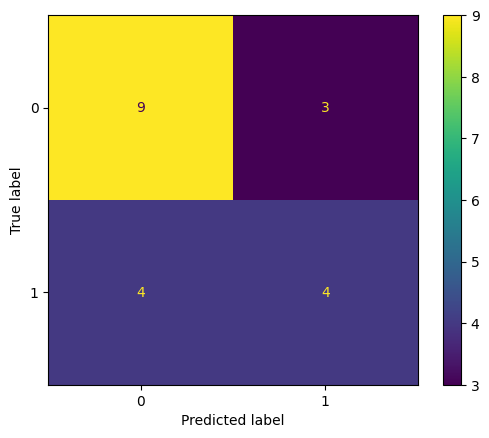

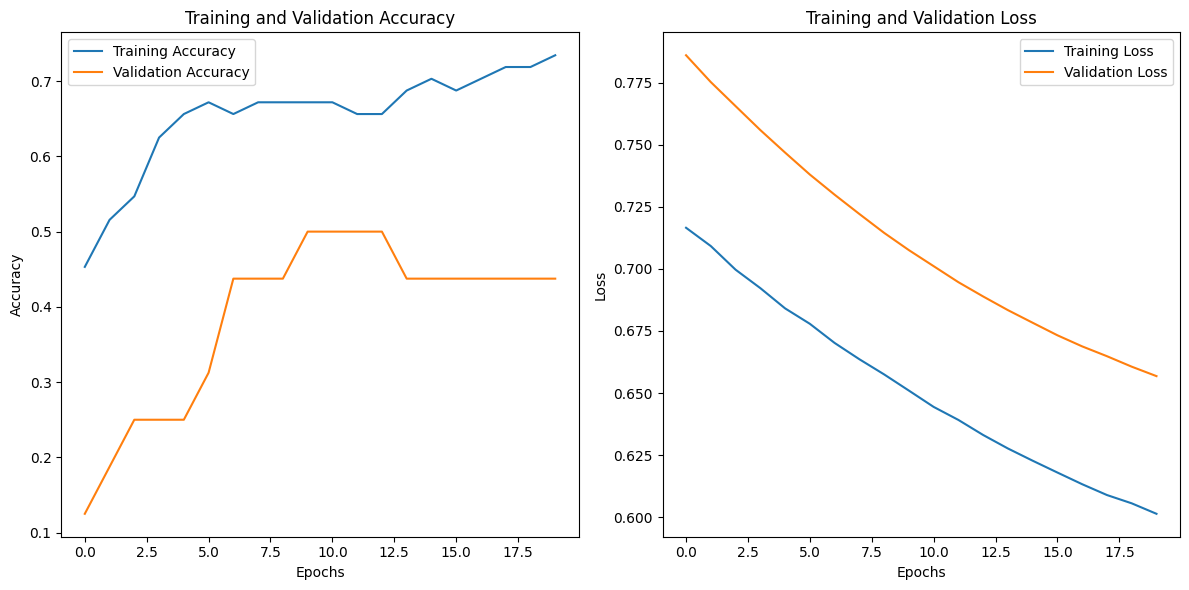

In [ ]:

# Step 7: Classification Report
# Print a detailed classification report with precision, recall, F1-score, and support for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize confusion matrix
# Plot the confusion matrix to visualize model performance in terms of true positives, true negatives, false positives, and false negatives
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Step 9: Plot Training and Validation Loss/Accuracy
# Extract metrics from the history object (collected during training)
acc = history.history['accuracy']        # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']           # Training loss
val_loss = history.history['val_loss']   # Validation loss

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create the first subplot for accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')  # Add a title
plt.xlabel('Epochs')                           # Label the x-axis
plt.ylabel('Accuracy')                         # Label the y-axis
plt.legend()                                   # Add a legend

# Plot Loss
plt.subplot(1, 2, 2)  # Create the second subplot for loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')      # Add a title
plt.xlabel('Epochs')                           # Label the x-axis
plt.ylabel('Loss')                             # Label the y-axis
plt.legend()                                   # Add a legend

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()


#ANN with Backpropagation
##With dataset

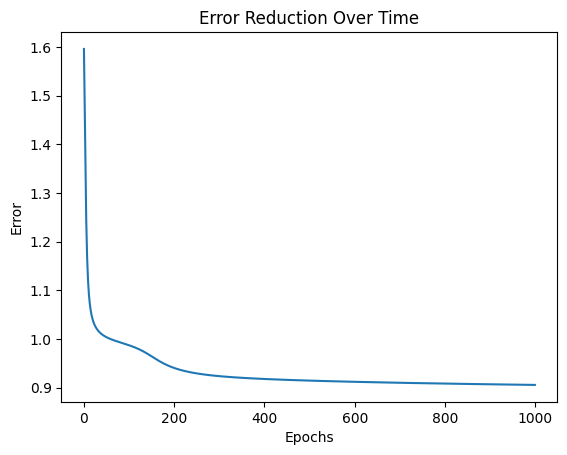

Actual: 0.0, Predicted: 0.3728021578210012
Actual: 1.0, Predicted: 0.7213078185122532
Actual: 1.0, Predicted: 0.37265782427177124
Actual: 1.0, Predicted: 0.743456765718528
Actual: 0.0, Predicted: 0.573696946051545


In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "/content/diabetes.csv"
df = pd.read_csv(file_path)

# Separate features and target
X = df[['Glucose']].values
y = df[['Outcome']].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize network parameters
input_size = 1
hidden_size = 5
output_size = 1
alpha = 0.01  # Learning rate
epochs = 1000

# Random weight initialization
np.random.seed(42)
w1 = np.random.randn(input_size, hidden_size)
w2 = np.random.randn(hidden_size, output_size)
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))

# Training loop
errors = []
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X_train, w1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, w2) + b2
    final_output = sigmoid(final_input)

    # Compute error
    error = y_train - final_output
    total_error = np.mean(np.square(error))
    errors.append(total_error)

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    d_hidden = np.dot(d_output, w2.T) * sigmoid_derivative(hidden_output)

    # Update weights and biases
    w2 += np.dot(hidden_output.T, d_output) * alpha
    w1 += np.dot(X_train.T, d_hidden) * alpha
    b2 += np.sum(d_output, axis=0, keepdims=True) * alpha
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * alpha

# Plot error reduction
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error Reduction Over Time")
plt.show()

# Test the model
hidden_test = sigmoid(np.dot(X_test, w1) + b1)
predicted_salary = sigmoid(np.dot(hidden_test, w2) + b2)

# Rescale predictions to original range
predicted_salary = scaler.inverse_transform(predicted_salary)
y_test_original = scaler.inverse_transform(y_test)

# Print some predictions
for i in range(5):
    print(f"Actual: {y_test_original[i][0]}, Predicted: {predicted_salary[i][0]}")
